In [1]:
#Import hugo_converter and numpy for plotting
import project_driver as hc
import numpy as np


/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


# Hugo's converter: a practical guide

During my last year ½ at with the cosmic dawn group, I designed an algorithm to fit for z-reion parameters using 21cmFAST inouts or any other density or redshfit of reionization field. Here's a quick guide on how to use the main functions of the package 

## get_params value :
## the basic function to get z-reion parameters value from 21cmFAST inputs

### Running  it's simplest form

It's simplest form: Hugo's converter will run 21cmFASt with all it's default parameters, and output the best fit value of it's free parameters : alpha, b_0 and k_0

In [3]:
hc.get_params_values()

/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/py21cmfast/inputs.py:485: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
computing the redshift of reionization: 100%|███| 60/60 [02:51<00:00,  2.86s/it]
/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/powerbox/dft.py:97: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/powerbox/tools.py:146: RuntimeWarning: invalid value encountered in true_divide
  bins = np.bincount(indx, weights=(weights * coords).flatten(), min

(1.9781825148427286, 1.2308322374438014, 0.6778862752543972)

## but the converter has so many other options

### 1. modify Box length and size

In [15]:
#in the following example, I have a box of 200Mpc³ that are composed of 300³ voxels
#I also have adjusted the range range to go quicker
# Please note that the units of the parameters are the same as the one entered in box_len
hc.get_params_values(box_dim = 100, box_len = 200, redshift_range = np.linspace(5,18,15))

100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1246.28it/s]


(2.606279536173081, 1.1517441967717281, 0.877543555014364)

### 2. Get the confidence range (68% of the posterior distribution)


In [11]:
hc.get_params_values(include_confidencerange = True, redshift_range = np.linspace(5,18,60))

100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1201.44it/s]


([1.3396773235936024, 1.94989352230679, 2.887417344235558],
 [1.1419135598281662, 1.231582190195832, 1.392800284510482],
 [0.3865171579175717, 0.6708959927199497, 1.115183838382584])

### 3. Make sure that the process goes well by (can therefore decide to go for medians as best value)

  0%|                                                  | 0/5000 [00:00<?, ?it/s]/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 5000/5000 [00:04<00:00, 1162.24it/s]


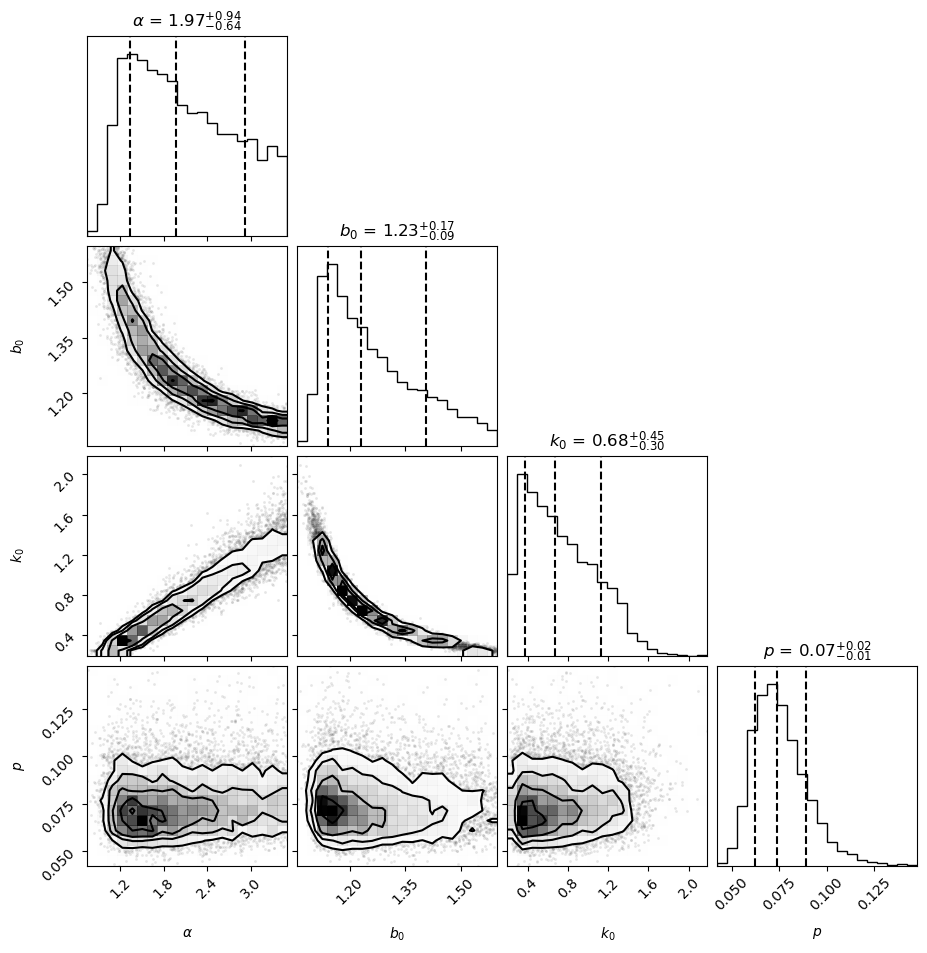

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


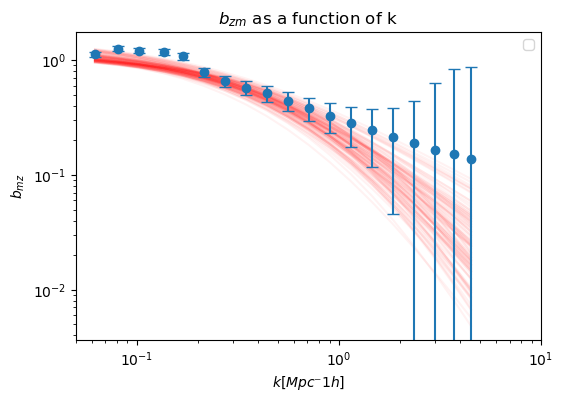

([1.3335379786353, 1.9719663604447886, 2.9100306113847094],
 [1.1405552409522643, 1.2309756601384678, 1.405689651551839],
 [0.3737225825785771, 0.6752075890007883, 1.125237884336955])

In [13]:
hc.get_params_values(include_confidencerange = True, plot_best_fit= True, plot_corner = True, redshift_range = np.linspace(5,18,60))

### 4. Output the density fields and/or the redshfit of reionization field 


  0%|                                                                                                                                                                             | 0/5000 [00:00<?, ?it/s]/home/hugo/anaconda3/envs/21cmFASTenv/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1217.47it/s]


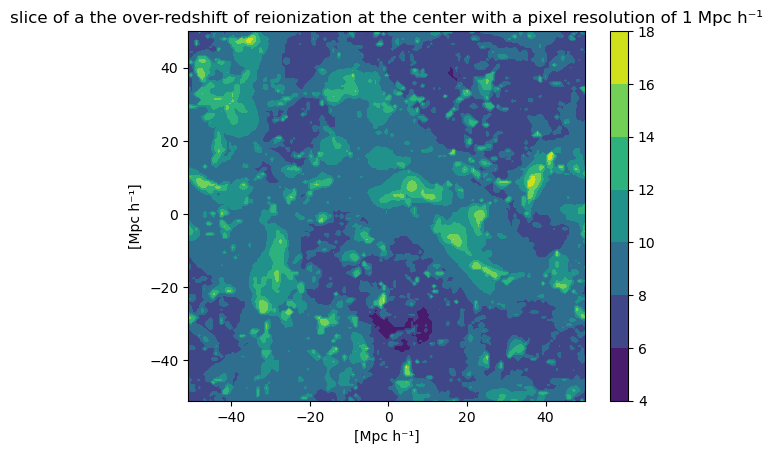

In [3]:
# in bonus, let's try it with different astro_params plot a slice of the produces redshift of reionization field.
a,b_0,k_0,density_field, zre_field = hc.get_params_values(return_zre_field = True, return_density = True, astro_params = {'HII_EFF_FACTOR':45})
hc.zre.plot_zre_slice(zre_field)

### 5. Input your own density field (also work for z_re field)

One thing you can do is import you're own density field, your own redshift of reionization field (or both) and get z-reion parameter from here. 

If you insert your own redshfit of reionization field, the process will be extremly faster, since computing it is what takes time.

In [6]:
hc.get_params_values(density_field = density_field, zre_field = zre_field ) 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1196.35it/s]


(1.4981201482868944, 1.1321638576585678, 0.4979682454397617)

## Apply to z-reion

This package comes in bonus with Paul Laplante z-reion's package. You can use your finding with my algorithm to test a bunch of redshfit of reionization field! 

Let's try an example where we used the parameters from the field above to plot for the redshfit of reionization field


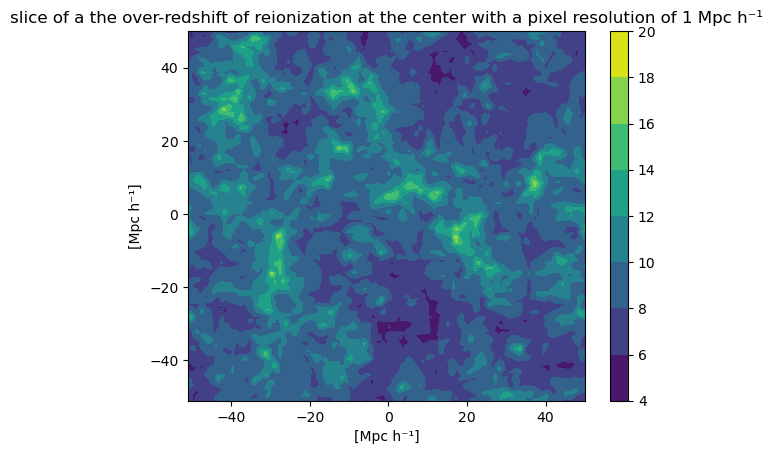

In [5]:
zre_zreion = hc.zr.apply_zreion(density_field, np.mean(zre_field), a,k_0, 143, b0 = b_0)
hc.zre.plot_zre_slice(zre_zreion)

## Other available functions

### So many analysis functions

This code provides an extensive set of function to study the differences between z-reion and 21cmFAST
Some of them include : ionization histories, power spectrums, ionization histories, brightness temperatures, TAU parameters analysis etc. 

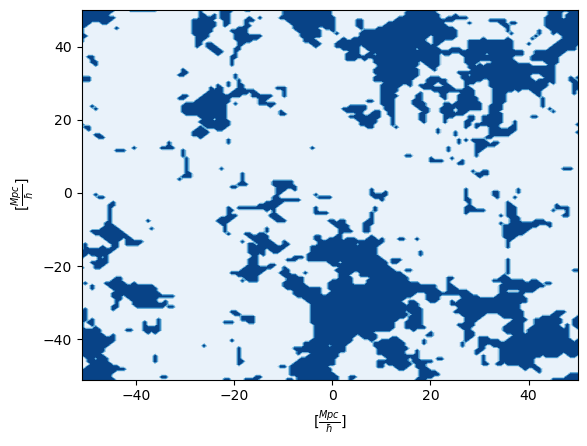

In [11]:
a = hc.pp.ionization_map_gen(7.7, 143, zre_zreion,  plot = True)

computing the reionization history: 100%|███████| 60/60 [00:01<00:00, 43.38it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


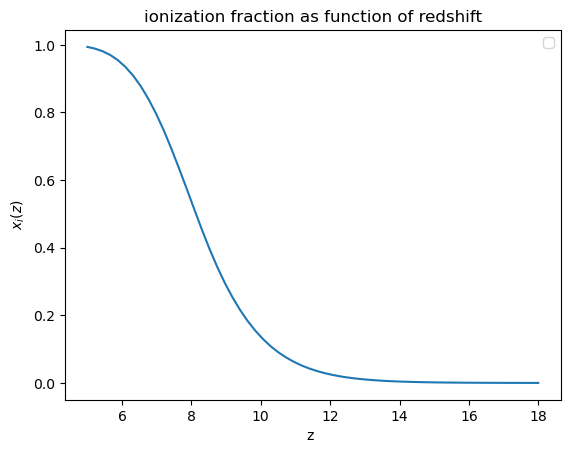

In [12]:
ion_rate, width50, width90 = hc.pp.reionization_history(np.linspace(5,18,60), zre_zreion, plot = True, comp_width = True)

### Run simple 21cmFAST fields (such as brightness temperature) and save them

One simple thing this code can run is a simplified 21cmFAST. If you ever just want to save a density field, a xH (neutral hydrogen map) or a birghtness temperature field, simply enter the redshift, box size and box dimension, along with the field you want to save. (optional astro or cosmo parameters) >

In [ ]:
#This example saves the 3 fields at a redshift for a 200Mpc box that's 150x150x150
hc.compute_several_21cmFASt_fields(8.0, 150, 200, astro_params={"NU_X_THRESH": 500},
                                   density_field=True, xH_field=True, BT_field=True):

### Run several runs with different parameter value

Here is an example of the dictionnary it gives : 


### Run 2D parameters space run to verify the effect of 2 simultanesouly varying parameters (stored under an object)

One of the key work of the past year as been parameter space study. To do so, runs with 2 varying astrophysical inputs have been launched. Results is a two dimensional array filled with objects containing different 
With this you can also test a bunch of features, such as the brightness temperature power spectrum, ionization effieciency and ect. Here is a schema of what the 2D array of object looks like, and a detailed Flow chart of every callable observable
![title](img/hugo_converter.png)